In [2]:
%cd ..

g:\AI\Electro_Pi\Deploy_Chest_X_Ray_Session\X-Ray-Classification


In [3]:
from PIL import Image

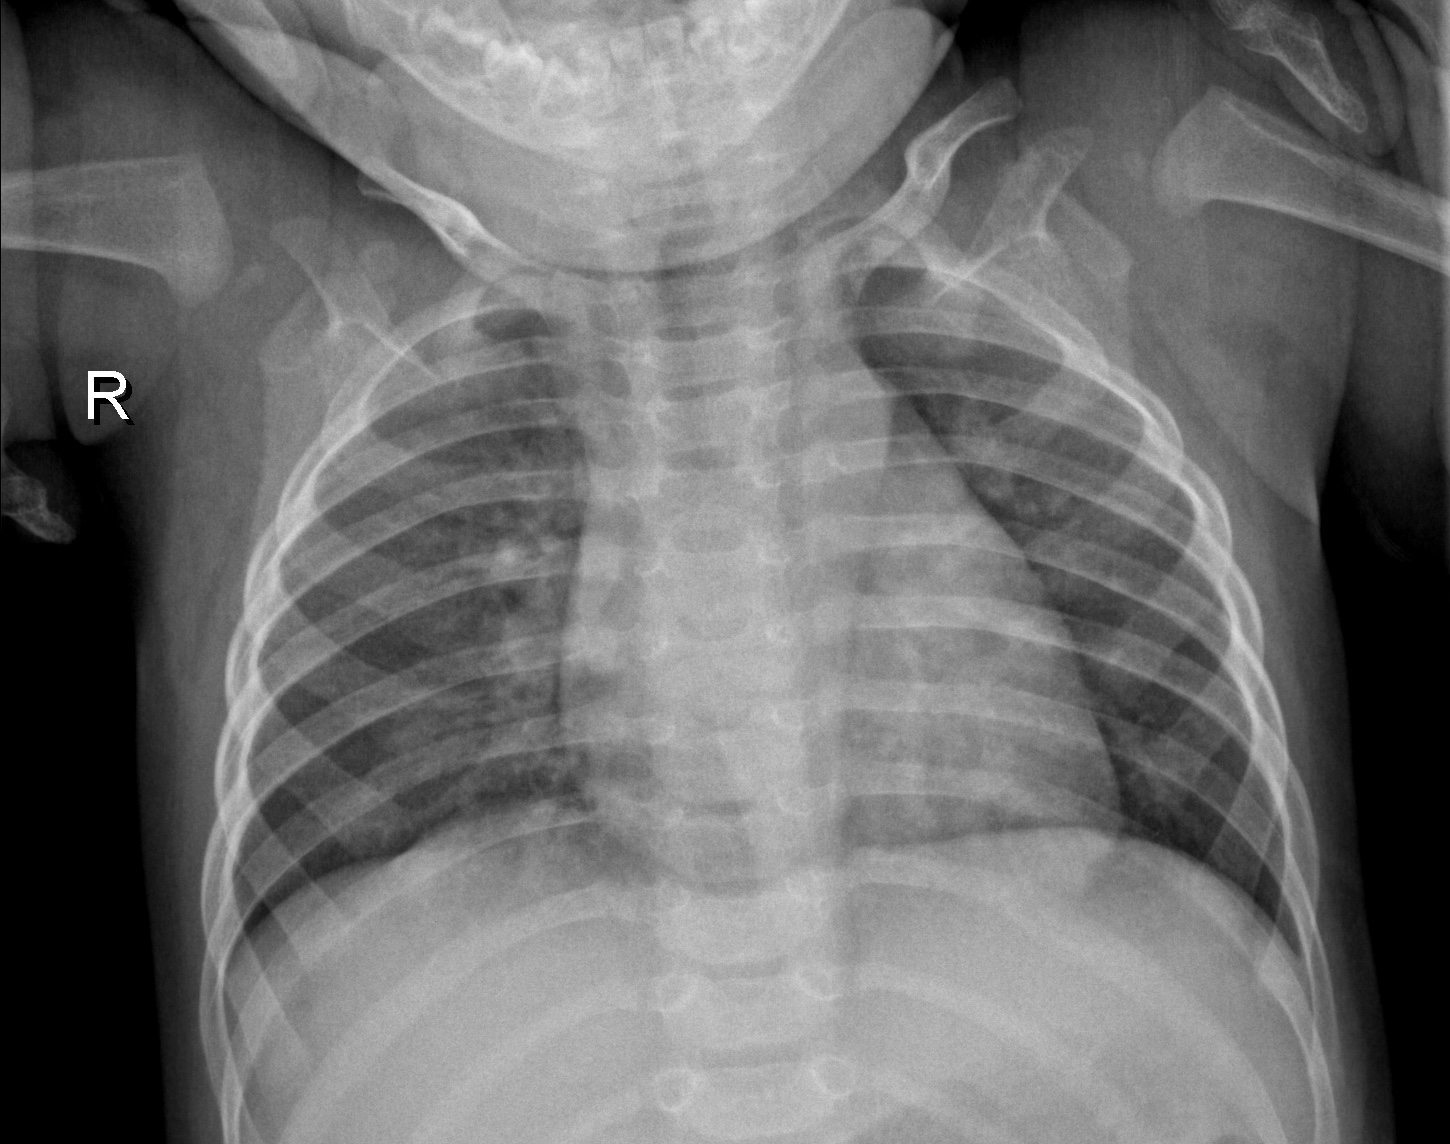

In [4]:
Image.open(r"data\chest_xray\train\NORMAL\IM-0131-0001.jpeg")

# bulid Data Map

In [5]:
from pathlib import Path 
import os 
import pandas as pd 
from glob import glob


In [6]:

def bulid_data_map(folder_path):
    imgs_paths= glob(folder_path + r"\*.jpeg")
    clas = Path(folder_path).name
    split = Path(folder_path).parent.name
    return pd.DataFrame({
        "imgs_paths": imgs_paths,
        "clas" : clas,
        "split": split
    })

test_normal = bulid_data_map(r"data\chest_xray\test\NORMAL" )
test_PNEUMONIA = bulid_data_map(r"data\chest_xray\test\PNEUMONIA" )

train_normal = bulid_data_map(r"data\chest_xray\train\NORMAL" )
train_PNEUMONIA = bulid_data_map(r"data\chest_xray\train\PNEUMONIA" )

val_normal = bulid_data_map(r"data\chest_xray\val\NORMAL" )
val_PNEUMONIA = bulid_data_map(r"data\chest_xray\val\PNEUMONIA" )

data= pd.concat([
    test_normal,
    test_PNEUMONIA,
    train_normal,
    train_PNEUMONIA,
    val_normal,
    val_PNEUMONIA

])


In [7]:
data

,imgs_paths,clas,split
0,data\chest_xray\test\NORMAL\IM-0001-0001.jpeg,NORMAL,test
1,data\chest_xray\test\NORMAL\IM-0003-0001.jpeg,NORMAL,test
2,data\chest_xray\test\NORMAL\IM-0005-0001.jpeg,NORMAL,test
3,data\chest_xray\test\NORMAL\IM-0006-0001.jpeg,NORMAL,test
4,data\chest_xray\test\NORMAL\IM-0007-0001.jpeg,NORMAL,test
...,...,...,...
3,data\chest_xray\val\PNEUMONIA\person1949_bacte...,PNEUMONIA,val
4,data\chest_xray\val\PNEUMONIA\person1950_bacte...,PNEUMONIA,val
5,data\chest_xray\val\PNEUMONIA\person1951_bacte...,PNEUMONIA,val
6,data\chest_xray\val\PNEUMONIA\person1952_bacte...,PNEUMONIA,val


# EdA

In [8]:
sample= data.sample(1)
img_path = sample.iloc[0]["imgs_paths"]
Image.open(img_path).size

(1464, 1164)

In [ ]:
WIDTH= 128
HEIGHT= 128
from tqdm import tqdm
for i , row in tqdm( data.iterrows() , total = data.shape[0]):
    img_path= row["imgs_paths"]
    img= Image.open(img_path)
    resized_img= img.resize((WIDTH, HEIGHT))

    img_path= Path(img_path)
    img_name= img_path.name
    img_clas= img_path.parent.name
    img_split= img_path.parent.parent.name 

    final_img_name = img_split + "_" + img_clas + "_"+ img_name
    
    resized_img.save("data/resized/"+ final_img_name)


100%|██████████| 5856/5856 [00:56<00:00, 103.60it/s]


In [14]:
resized_imgs_paths= []
for i , row in tqdm( data.iterrows() , total = data.shape[0]):
    img_path= row["imgs_paths"]
    img_path= Path(img_path)
    img_name= img_path.name
    img_clas= img_path.parent.name
    img_split= img_path.parent.parent.name 

    final_img_name = img_split + "_" + img_clas + "_"+ img_name
    resized_imgs_paths.append("data/resized/"+ final_img_name)

  0%|          | 0/5856 [00:00<?, ?it/s]

100%|██████████| 5856/5856 [00:00<00:00, 12963.24it/s]


In [16]:
data["resized"]= resized_imgs_paths
data.to_csv("data/data_map.csv" , index=False)